## Importing needed libraries
- nltk ( natural language toolkit ) for proprocessing of the data <br>
- pandas for importing the dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import wordcloud
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
#importing dataset
dataset = pd.read_csv('train.csv')

In [3]:
#viewing 5 rows of dataset
print(dataset.shape)
dataset.head(5)

(111795, 4)


,Id,Title,Content,Label
0,227464,"Netflix is coming to cable boxes, and Amazon i...",if you subscribe to one of three rinky-dink (...,Entertainment
1,244074,"Pharrell, Iranian President React to Tehran 'H...","pharrell, iranian president react to tehran '...",Entertainment
2,60707,Wildlife service seeks comments,the u.s. fish and wildlife service has reopen...,Technology
3,27883,Facebook teams up with Storyful to launch 'FB ...,the very nature of social media means it is o...,Technology
4,169596,Caesars plans US$880 mln New York casino,caesars plans us$880 mln new york casino jul ...,Business


In [4]:
dataset['Text']= dataset['Title']+dataset['Content']

# Text Cleaning 

To clean the text, the following steps are implemented:

- removing special characters and numbers
- changing all letters to lower cases
- removing stopwords
- lematization 


In [6]:
lemmatizer = WordNetLemmatizer() 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
stop = stopwords.words('english3')

def lemmatize_text1(text):
    return [lemmatizer.lemmatize(w,pos="v") for w in w_tokenizer.tokenize(text)]
def lemmatize_text2(text):
    return [lemmatizer.lemmatize(w,pos="n") for w in text]


In [7]:
dataset['Text']= dataset['Text'].str.replace('[^\w\s]','') #remove punctuation
dataset['Text'] = dataset['Text'].str.replace('\d+', '') #remove numbers 
dataset['Text']= dataset['Text'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lowercase
dataset['Text']= dataset['Text'].apply(lemmatize_text1)
dataset['Text']= dataset['Text'].apply(lemmatize_text2)
dataset['Text']= dataset['Text'].apply(lambda x: " ".join(x for x in x if x not in stop)) #remove stopwords

# Categorization

In [8]:
df_E=dataset['Text'].loc[dataset['Label']=='Entertainment']
df_T=dataset['Text'].loc[dataset['Label']=='Technology']
df_B=dataset['Text'].loc[dataset['Label']=='Business']
df_H=dataset['Text'].loc[dataset['Label']=='Health']
print("Number of Entertainment articles: %d"  % df_E.shape[0])
print("Number of Technology articles: %d"  % df_T.shape[0])
print("Number of Business articles: %d"  % df_B.shape[0])
print("Number of Health articles: %d"  % df_H.shape[0])

Number of Entertainment articles: 44834
Number of Technology articles: 30107
Number of Business articles: 24834
Number of Health articles: 12020


In [9]:
import matplotlib.pyplot as plt
y=np.array([df_E.shape[0],df_T.shape[0],df_B.shape[0],df_H.shape[0]])
x=np.array([1,2,3,4])
plt.bar(x,y)
plt.ylabel('Number of articles')
plt.xlabel('Category')
lables=["Entertainment","Technology","Business","Health"]
plt.xticks(x, lables)
plt.show()

<Figure size 640x480 with 1 Axes>

# Clouds

In [10]:
#importing libraries needed for the wordcloud
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
corpusE=list(pd.Series(' '.join(df_E).split()))
corpusT=list(pd.Series(' '.join(df_T).split()))
corpusB=list(pd.Series(' '.join(df_B).split()))
corpusH=list(pd.Series(' '.join(df_H).split()))

In [12]:
print('{},{},{},{}'.format(len(corpusE),len(corpusT),len(corpusB),len(corpusH)))

8082419,5952916,5577691,2489559


In [13]:
#frequency of words in each category
freqE=pd.Series(' '.join(df_E).split()).value_counts(normalize=True)
freqT=pd.Series(' '.join(df_T).split()).value_counts(normalize=True)
freqB=pd.Series(' '.join(df_B).split()).value_counts(normalize=True)
freqH=pd.Series(' '.join(df_H).split()).value_counts(normalize=True)

## Entertainment cloud

In [14]:
#converting the image into a numpy array 
mask= np.array(Image.open('ent.png'))
word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask,max_words = 200).generate(' '.join(corpusE))

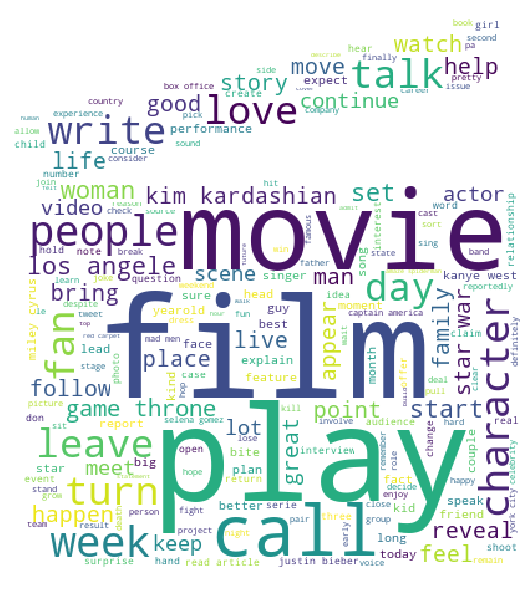

In [15]:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [16]:
word_cloud.to_file('worde.png')

## Technology cloud

In [17]:
#converting the image into a numpy array 
mask= np.array(Image.open('tech.png'))
word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask,max_words = 200).generate(' '.join(corpusT))

creating the wordcloud for the other categories

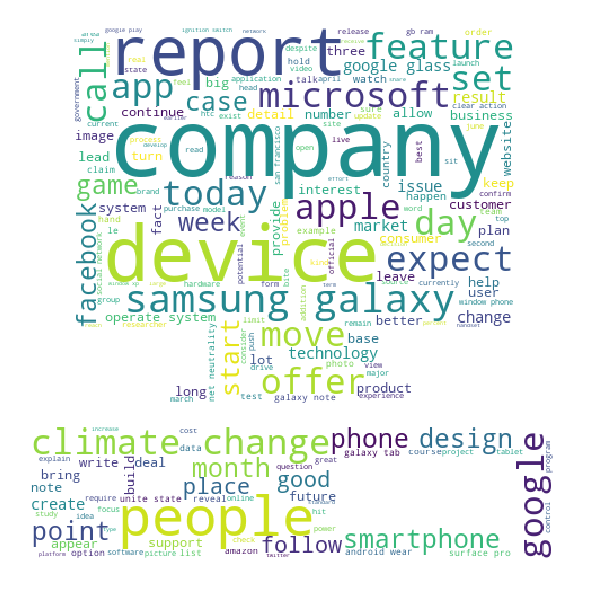

In [18]:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [19]:
word_cloud.to_file('wordt.png')

## Business cloud

In [20]:
#converting the image into a numpy array 
mask= np.array(Image.open('bus.png'))
word_cloud = WordCloud(width = 512, height = 250, background_color='white', mask=mask,max_words = 200).generate(' '.join(corpusB))

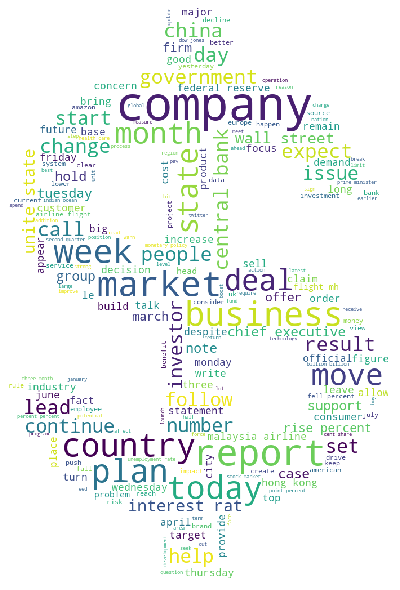

In [21]:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
word_cloud.to_file('wordB.png')

## Health cloud

In [23]:
#converting the image into a numpy array 
mask= np.array(Image.open('health.png'))
word_cloud = WordCloud(width = 512, height = 512, background_color='white', mask=mask,max_words = 200).generate(' '.join(corpusH))

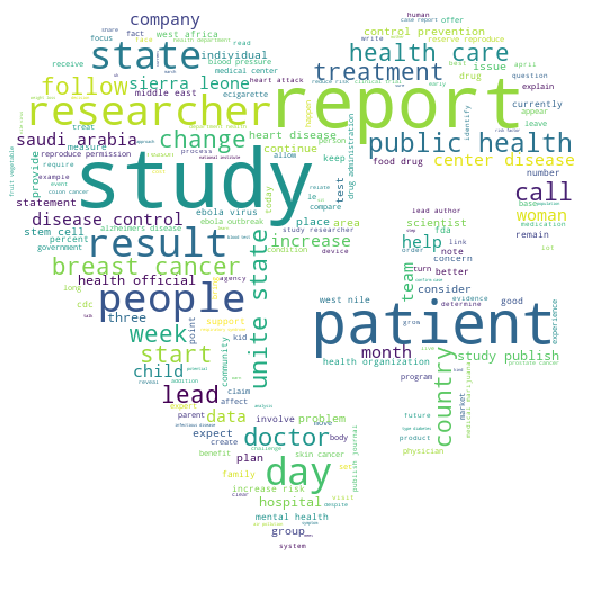

In [24]:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
word_cloud.to_file('wordH.png')